# KNN電影分類特徵值的項目與評分

## 題目：
![](images/knn.png)

## 答案：
![output](images/knn_1.png)

## 歐幾里德距離的平方和

In [1]:
import math

film = [5, 7, 8, 10, 2]  # 玩命關頭特徵值
film_titles = [          # 比較影片片名
    '復仇者聯盟',
    '決戰中途島',
    '冰雪奇緣',
    '雙子殺手',
]
film_features = [        # 比較影片特徵值
    [2, 8, 8, 5, 6],
    [5, 6, 9, 2, 5],
    [8, 2, 0, 0, 10],
    [5, 8, 8, 8, 3],
]

# 儲存影片相似度值
dist = [] 
# 計算各電影相似程度（使用歐幾里德距離）
for features in film_features:
    distances = 0
    for i in range(len(features)):
        distances += (film[i]-features[i]) ** 2
    dist.append(distances)

# 求最小值
min_dist = min(dist)
# 最小值的索引
min_index = dist.index(min_dist)

print("與玩命關頭最相似的電影 : ", film_titles[min_index])
print("相似度值 : ", min_dist)
print("相似度值 : ", dist[min_index])

# 印出玩命關頭與其他所有電影的相似程度
for i in range(len(dist)):
    print("影片 : %s, 相似度 : %6.2f" % (film_titles[i], dist[i]))

與玩命關頭最相似的電影 :  雙子殺手
相似度值 :  6
相似度值 :  6
影片 : 復仇者聯盟, 相似度 :  51.00
影片 : 決戰中途島, 相似度 :  75.00
影片 : 冰雪奇緣, 相似度 : 262.00
影片 : 雙子殺手, 相似度 :   6.00


## 歐幾里德距離的平方根

In [2]:
import math

film = [5, 7, 8, 10, 2]  # 玩命關頭特徵值
film_titles = [          # 比較影片片名
    '復仇者聯盟',
    '決戰中途島',
    '冰雪奇緣',
    '雙子殺手',
]
film_features = [        # 比較影片特徵值
    [2, 8, 8, 5, 6],
    [5, 6, 9, 2, 5],
    [8, 2, 0, 0, 10],
    [5, 8, 8, 8, 3],
]

# 儲存影片相似度值
dist = [] 

# 計算各電影相似程度（使用歐幾里德距離）
for features in film_features:
    distance = math.sqrt(sum((f - t) ** 2 for f, t in zip(film, features)))
    dist.append(distance)

# 求最小值
min_dist = min(dist)

# 最小值的索引
min_index = dist.index(min_dist)

print("與玩命關頭最相似的電影 : ", film_titles[min_index])
print("相似度值 : ", min_dist)

# 印出玩命關頭與其他所有電影的相似程度
for i in range(len(dist)):
    print("影片 : %s, 相似度 : %6.2f" % (film_titles[i], dist[i]))

與玩命關頭最相似的電影 :  雙子殺手
相似度值 :  2.449489742783178
影片 : 復仇者聯盟, 相似度 :   7.14
影片 : 決戰中途島, 相似度 :   8.66
影片 : 冰雪奇緣, 相似度 :  16.19
影片 : 雙子殺手, 相似度 :   2.45


# KNN

![knn_2](images/knn_2.png)

- 從訓練集合找跟這新樣本距離最近的K個特徵樣本來決定該新樣本點的最終類別。
- 對於異常值不敏感
- 缺點在於計算量大、非常耗時，因為要載入所有特徵集合加入距離計算，所以記憶體空間用量也非常大。

# 畢式定理

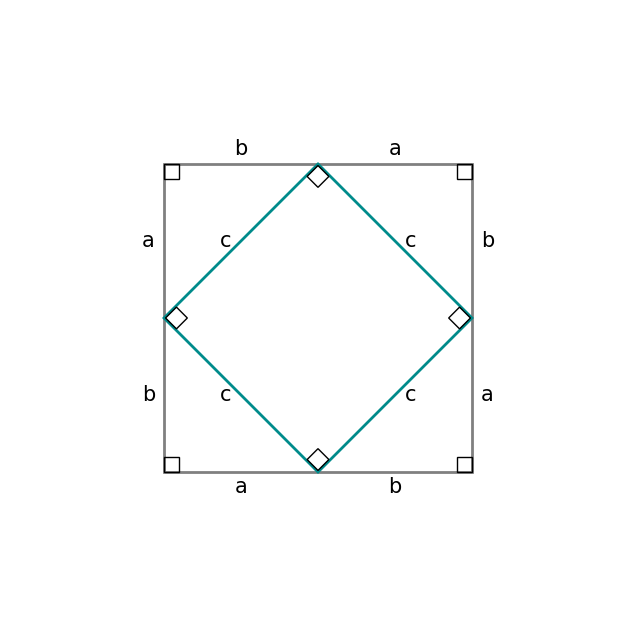

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.transforms import Affine2D

# 創建畫布
fig, ax = plt.subplots(figsize=(8, 8))

# 畫外部正方形
outer_square = patches.Polygon(
    [[-1, -1], [1, -1], [1, 1], [-1, 1]],
    closed=True, edgecolor='gray', facecolor='none', linewidth=2
)
ax.add_patch(outer_square)

# 畫內部正方形
transform = Affine2D().rotate_deg(45) + ax.transData
inner_square = patches.Polygon(
    [[-np.sqrt(2)/2, -np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2], [np.sqrt(2)/2, np.sqrt(2)/2], [-np.sqrt(2)/2, np.sqrt(2)/2]],
    closed=True, edgecolor='darkcyan', facecolor='none', linewidth=2, transform=transform
)
ax.add_patch(inner_square)

# 添加 a, b, c 字符
positions_a = [(-0.5, -1.1), (1.1, -0.5), (0.5, 1.1), (-1.1, 0.5)]
positions_b = [(0.5, -1.1), (1.1, 0.5), (-0.5, 1.1), (-1.1, -0.5)]
positions_c = [(-0.6, 0.5), (0.6, 0.5), (0.6,-0.5), (-0.6, -0.5)]

for pos in positions_a:
    ax.text(pos[0], pos[1], 'a', fontsize=15, ha='center', va='center', color='black')
for pos in positions_b:
    ax.text(pos[0], pos[1], 'b', fontsize=15, ha='center', va='center', color='black')
for pos in positions_c:
    ax.text(pos[0], pos[1], 'c', fontsize=15, ha='center', va='center', color='black')

# 設置坐標軸
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.axis('off')

# 添加直角標示
def add_right_angle_marker(ax, x, y, size=0.1, angle=0, color='black'):
    marker = patches.Polygon(
        [[x, y], [x + size, y], [x + size, y + size], [x, y + size]],
        closed=True, edgecolor=color, facecolor='none', linewidth=1
    )
    t = Affine2D().rotate_deg(angle) + ax.transData
    marker.set_transform(t)
    ax.add_patch(marker)

# 外部正方形直角標示
add_right_angle_marker(ax, 0.9, -1)
add_right_angle_marker(ax, 0.9, -1, angle=90)
add_right_angle_marker(ax, 0.9, 0.9, angle=180)
add_right_angle_marker(ax, -1, 0.9)

# 內部正方形直角標示
add_right_angle_marker(ax, 0.6, 0.6, angle=45)
add_right_angle_marker(ax, -0.7, 0.6, angle=135)
add_right_angle_marker(ax, -0.7, 0.6, angle=225)
add_right_angle_marker(ax, -0.7, -0.7, angle=315)

# 顯示圖像
plt.show()

## 概念
- 畢式定理: 直角三角形中兩個直角邊長的平方和等於斜邊長的平方
- 公式表示為：$ a^2 + b^2 = c^2 $

## 推導過程
1. **大正方形的面積**: $ (a + b)^2 $

2. **四個直角三角形的總面積**:
   - 每個直角三角形的面積為 $ \frac{1}{2}ab $
   - 四個直角三角形的總面積為 $ 4 \times \frac{1}{2}ab = 2ab $

3. **中間正方形的面積**: $ c^2 $

4. **整理公式**:
    - 大正方形的面積 = 中間正方形的面積 + 四個直角三角形的總面積: $ (a + b)^2 = c^2 + 2ab $
   - 展開大正方形的面積公式 $ (a + b)^2 = a^2 + 2ab + b^2 $
   - 將兩個面積公式相等: $ a^2 + 2ab + b^2 = c^2 + 2ab $
   - 消去兩邊的$2ab$: $ a^2 + b^2 = c^2 $